In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
  
# Folder Path
data_dir = "/content/drive/MyDrive/Colab Notebooks/flower_photos"
  
# Change the directory
os.chdir(path)

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7551637034_55ae047756_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

NameError: ignored

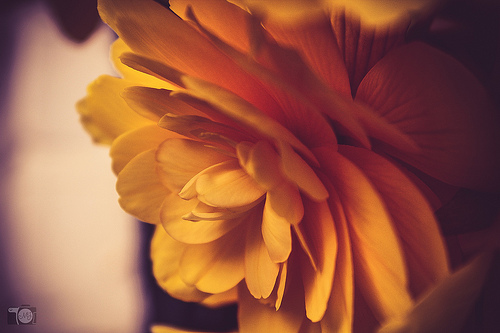

In [ ]:
Image.open(str(roses[3]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7551637034_55ae047756_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/7345657862_689366e79a.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(322, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

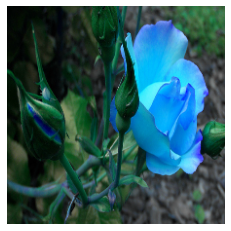

In [ ]:
plt.axis('off')
plt.imshow(X[0])

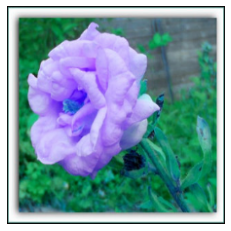

In [ ]:
plt.axis('off')
plt.imshow(X[1])

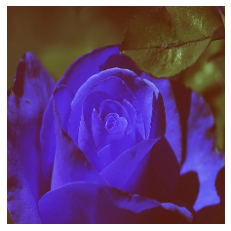

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 550, 722])

In [ ]:
image_labels[795]

'shower curtain'

In [ ]:
image_labels = []
with open("/content/drive/MyDrive/Colab Notebooks/flower_photos/1.txt", "r") as f:
    image_labels = f.read().splitlines()

Pretrained

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)#Freez

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)#Coustom Layer
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 83s 908ms/step - loss: 0.8214 - acc: 0.6860
Epoch 2/5
86/86 [==============================] - 76s 883ms/step - loss: 0.4233 - acc: 0.8448
Epoch 3/5
86/86 [==============================] - 77s 891ms/step - loss: 0.3362 - acc: 0.8837
Epoch 4/5
86/86 [==============================] - 76s 880ms/step - loss: 0.2786 - acc: 0.9015
Epoch 5/5
86/86 [==============================] - 76s 879ms/step - loss: 0.2369 - acc: 0.9255


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 27s 865ms/step - loss: 0.3577 - acc: 0.8856


[0.35766687989234924, 0.8856208920478821]